In [1]:
from PIL import Image
import numpy as np
import os
if os.name == "nt":
    import msvcrt
else:
    import tty
    import termios
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 as cv
import random
from math import log
import pandas
# from google.colab.patches import cv2_imshow
from tqdm import tqdm
import image_tools as it

In [2]:
# def rgb_to_img(rows,cols,r,g,b):
#     img = []
#     for i in range(rows):
#         curr = []
#         for j in range(cols):
#             curr.append([r[i][j],g[i][j],b[i][j]])
#         img.append(curr)
#     return img


<class 'numpy.ndarray'>


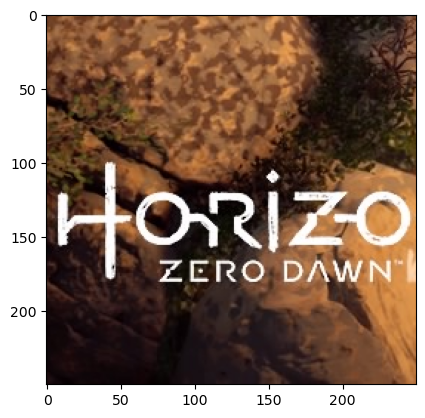

In [3]:
img = it.get_image_rgb('graphs\orig.png')
print(type(img))
r,g,b = it.get_rgb_arr2(img,fmt = 'rgb') # r g b 都是2维数组
plt.imshow(img) # rgb

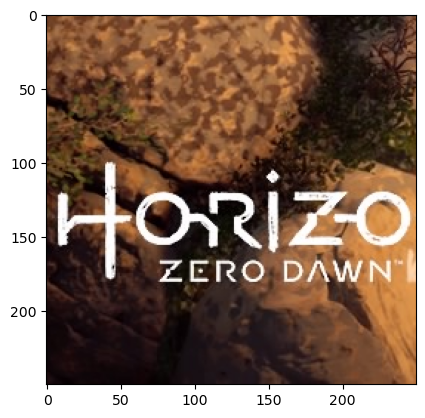

In [4]:
row,col,n = img.shape
newimg = it.rgb_to_img(row,col,r,g,b)
# print(newimg)
plt.imshow(newimg)

True

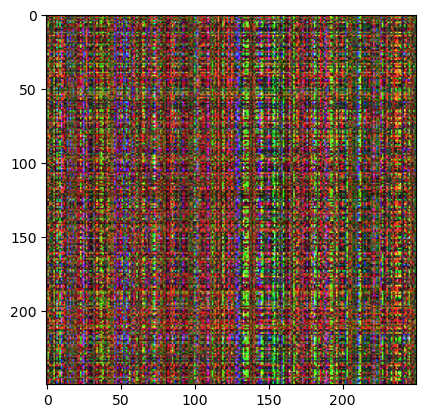

In [5]:
# 垂直方向互换
temp_r = r[:] # 拷贝 直接为r则引用
temp_g = g[:]
temp_b = b[:]
# print(temp_r)
# random.shuffle(img)
random.shuffle(temp_r)
random.shuffle(temp_g)
random.shuffle(temp_b)
shuffled_img = it.rgb_to_img(row,col,temp_r,temp_g,temp_b)

# 水平方向互换
shuffled_img2 = np.array(shuffled_img)
shuffled_img2 = shuffled_img2.transpose(1,0,2)
r2,g2,b2 = it.get_rgb_arr2(shuffled_img2,'rgb')
random.shuffle(r2)
random.shuffle(g2)
random.shuffle(b2)
shuffled_img2 = it.rgb_to_img(row,col,r2,g2,b2)
plt.imshow(shuffled_img2)
cv.imwrite("test.png",np.asarray(shuffled_img2))


In [ ]:
img = cv.imread('E:\CodeBase\CorC++\chaos\image\pic1.ppm')
cv.imshow('123',img)
cv.waitKey(0)
